# Data Mining Techniques | Project 1
> Spring Semester 2022-2023

> Stylianos Oikonomou | 1115201500243

Import Modules

In [1]:
import math
import numpy as np
import pandas as pd
from pandas import DataFrame
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

le = preprocessing.LabelEncoder()
scaler = StandardScaler()

# display all the Columns of a DataFrame
pd.set_option('display.max_columns', None)

Import Data Sets

In [2]:
source = "https://raw.githubusercontent.com/steoik/UoADit_Data-Mining-Techniques/main/Project1/data/marketing_campaign.csv"

df = pd.read_csv(source, sep = '\t')

Inspect the data

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Question 1

Check for NaN values

In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Drop rows that contain NaN values

In [5]:
df = df.dropna()
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Covert date strings to DateTime Objects

In [6]:
print(type(df['Dt_Customer'].values[0]))
df['Dt_Customer'] = df['Dt_Customer'].apply(lambda date: datetime.strptime(date, '%d-%m-%Y'))
print(type(df['Dt_Customer'].values[0]))

<class 'str'>
<class 'numpy.datetime64'>


All One Hot Encodings of non numerical values are performed on Question 7

# Question 2

Print the unique values of the columns 'Marital Status' and 'Education'

In [7]:
print('Education      :' , sorted(df['Education'].unique()))
print('Marital_Status :' , sorted(df['Marital_Status'].unique()))

Education      : ['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD']
Marital_Status : ['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow', 'YOLO']


Replace the 'Alone', 'Absurd', 'YOLO' Marital Statuses with 'Single'

In [8]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if (x=='Alone' or x=='Absurd' or x=='YOLO') else x)

print('Marital_Status :' , df['Marital_Status'].unique())

Marital_Status : ['Single' 'Together' 'Married' 'Divorced' 'Widow']


Plot the count values of the 'Marital_Status' and 'Education' Columns

In [9]:
Education_counts      = df['Education'].value_counts()
Marital_Status_counts = df['Marital_Status'].value_counts()

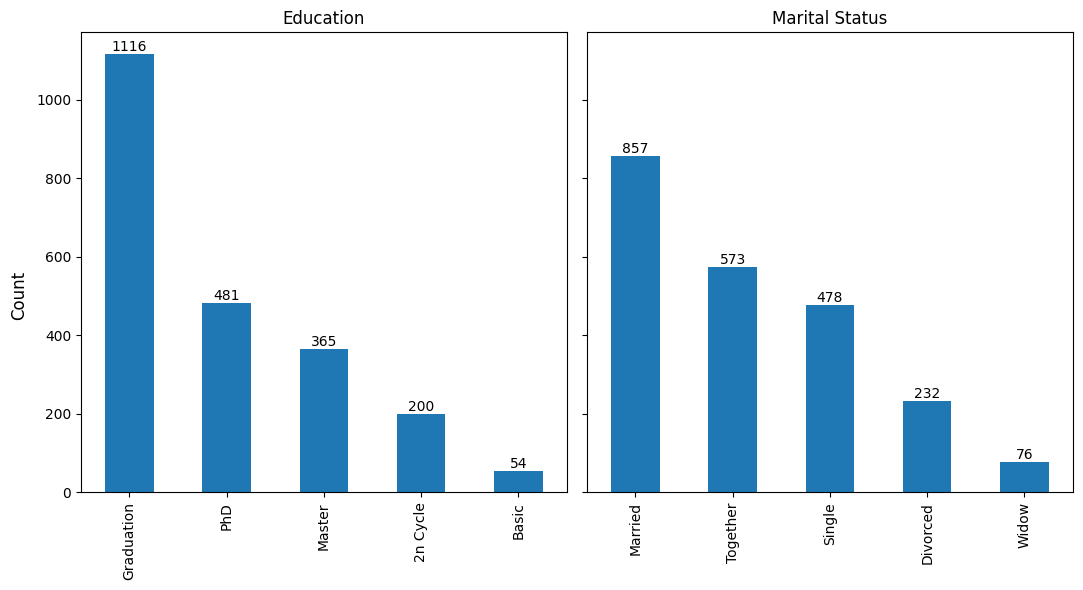

In [10]:
# create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(11, 6), sharey=True)

# plot the value counts of the two Columns
Education_counts.plot(kind='bar', ax=axs[0])
Marital_Status_counts.plot(kind='bar', ax=axs[1])

# set the titles of the subplots
axs[0].set_title('Education')
axs[1].set_title('Marital Status')

# add count values above the bars
for i, count in enumerate(Education_counts):
    axs[0].text(i, count, str(count), ha='center', va='bottom')
for i, count in enumerate(Marital_Status_counts):
    axs[1].text(i, count, str(count), ha='center', va='bottom')

# set a common y axes Label
fig.supylabel('Count')

# adjust the layout
plt.tight_layout()

# show the plot
plt.show()

# Question 3

In [11]:
for (idx, column) in zip(range(len(df.columns)), df.columns):
  print(idx, column)

0 ID
1 Year_Birth
2 Education
3 Marital_Status
4 Income
5 Kidhome
6 Teenhome
7 Dt_Customer
8 Recency
9 MntWines
10 MntFruits
11 MntMeatProducts
12 MntFishProducts
13 MntSweetProducts
14 MntGoldProds
15 NumDealsPurchases
16 NumWebPurchases
17 NumCatalogPurchases
18 NumStorePurchases
19 NumWebVisitsMonth
20 AcceptedCmp3
21 AcceptedCmp4
22 AcceptedCmp5
23 AcceptedCmp1
24 AcceptedCmp2
25 Complain
26 Z_CostContact
27 Z_Revenue
28 Response


A. Add the 'Customer_For' Column

In [12]:
df.insert(9, 'Customer_For', [ (np.datetime64('today') - np.timedelta64(Recency, 'D') - Dt_Customer).days for (Dt_Customer, Recency) in zip(df['Dt_Customer'], df['Recency']) ])
df['Customer_For'].head()

0    4020
1    3490
2    3701
3    3528
4    3482
Name: Customer_For, dtype: int64

B. Add the 'Age' Column

In [13]:
df.insert(2, 'Age', [ datetime.now().year - Year_Birth for Year_Birth in df['Year_Birth'] ])
print('Current Year: ', datetime.now().year)
df[['Year_Birth', 'Age']].head()

Current Year:  2023


,Year_Birth,Age
0,1957,66
1,1954,69
2,1965,58
3,1984,39
4,1981,42


C. Add the 'Spent' Column

In [14]:
df.insert(11, 'Spent', [ Wi+Fr+Me+Fi+Sw+Go for (Wi, Fr, Me, Fi, Sw, Go) in zip(df['MntWines'], df['MntFruits'], df['MntMeatProducts'], df['MntFishProducts'], df['MntSweetProducts'], df['MntGoldProds']) ])
df['Spent'].head()

0    1617
1      27
2     776
3      53
4     422
Name: Spent, dtype: int64

D. Add the 'Minorhome' Column

In [15]:
df.insert(6, 'Minorhome', [ Kidhome + Teenhome for (Kidhome, Teenhome) in zip(df['Kidhome'], df['Teenhome']) ])
df[['Kidhome', 'Teenhome', 'Minorhome']].head()

,Kidhome,Teenhome,Minorhome
0,0,0,0
1,1,1,2
2,0,0,0
3,1,0,1
4,1,0,1


E. Add the 'Family_Size' Column

In [16]:
# if the Marital_Status is set to Married or Together we asume there are 2 parents at home else 1
df.insert(6, 'Family_Size', [ Minorhome + (lambda MS : 2 if (MS == 'Married' or MS == 'Together') else 1)(Marital_Status) for (Minorhome, Marital_Status) in zip(df['Minorhome'], df['Marital_Status']) ])
df[['Marital_Status', 'Minorhome', 'Family_Size']].head()

,Marital_Status,Minorhome,Family_Size
0,Single,0,1
1,Single,2,3
2,Together,0,2
3,Together,1,3
4,Married,1,3


F. Add the 'Is_Parent' Column

In [17]:
df.insert(7, 'Is_Parent', [ False if Minorhome == 0 else True for Minorhome in df['Minorhome'] ])
df[['Minorhome', 'Is_Parent']].head()

,Minorhome,Is_Parent
0,0,False
1,2,True
2,0,False
3,1,True
4,1,True


G. Add the 'Living_With' Column

In [18]:
df.insert(5, 'Living_With', [ (lambda MS : 'Partner' if (MS == 'Married' or MS == 'Together') else 'Alone')(MS) for MS in df['Marital_Status'] ])
df[['Marital_Status', 'Living_With']].head()

,Marital_Status,Living_With
0,Single,Alone
1,Single,Alone
2,Together,Partner
3,Together,Partner
4,Married,Partner


H. Add the 'Age_Group' Column

In [19]:
def findAgeGroup(age) :
  if age <= 20:
    return "<21"
  elif age <= 30:
    return "21-30"
  elif age <= 40:
    return "31-40"
  elif age <= 50:
    return "41-50"
  elif age <= 60:
    return "51-60"
  elif age <= 70:
    return "61-70"
  elif age <= 80:
    return "71-80"
  else:
    return ">80"

In [20]:
df.insert(3, 'Age_Group', [ findAgeGroup(Age) for Age in df['Age'] ])
df[['Age', 'Age_Group']].head()

,Age,Age_Group
0,66,61-70
1,69,61-70
2,58,51-60
3,39,31-40
4,42,41-50


In [21]:
for (idx, column) in zip(range(len(df.columns)), df.columns):
  print(idx, column)

0 ID
1 Year_Birth
2 Age
3 Age_Group
4 Education
5 Marital_Status
6 Living_With
7 Income
8 Family_Size
9 Is_Parent
10 Minorhome
11 Kidhome
12 Teenhome
13 Dt_Customer
14 Recency
15 Customer_For
16 Spent
17 MntWines
18 MntFruits
19 MntMeatProducts
20 MntFishProducts
21 MntSweetProducts
22 MntGoldProds
23 NumDealsPurchases
24 NumWebPurchases
25 NumCatalogPurchases
26 NumStorePurchases
27 NumWebVisitsMonth
28 AcceptedCmp3
29 AcceptedCmp4
30 AcceptedCmp5
31 AcceptedCmp1
32 AcceptedCmp2
33 Complain
34 Z_CostContact
35 Z_Revenue
36 Response


# Question 4

Select Edge Cases

In [22]:
# if the edge_precentile is set to n the rows that contain the top n percent and bottom n percent of the selected column values will be removed
edge_percentile = 1
# potential Columns with edge cases
edge_case_list = ['Income', 'Spent', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

Print Statistics

In [23]:
print('{0:>16} {1:>8} {2:>8} {3:>8} {4:>8} {5:>8}   [{6} = {7}]'.format('column', 'LB', 'UB', 'min', 'mean', 'max', 'rows', df.shape[0]))
print('=============================================================')
for column in edge_case_list:
  print(f'{column:>16} {round(np.percentile(df[column], edge_percentile)):>8} {round(np.percentile(df[column], 100 - edge_percentile)):>8} {df[column].min():>8} {round(df[column].mean()):>8} {round(df[column].max()):>8}')

          column       LB       UB      min     mean      max   [rows = 2216]
          Income     7579    94459   1730.0    52247   666666
           Spent       13     2126        5      607     2525
        MntWines        1     1285        0      305     1493
       MntFruits        0      172        0       26      199
 MntMeatProducts        2      915        0      167     1725
 MntFishProducts        0      227        0       38      259
MntSweetProducts        0      176        0       27      262
    MntGoldProds        0      227        0       44      321


Remove Edge Cases

In [24]:
for column in edge_case_list:
  # find the lower and upper bound according to the edge_percentile
  lower_bound = round(np.percentile(df[column], edge_percentile))
  upper_bound = round(np.percentile(df[column], 100 - edge_percentile))

  # remove the rows with edge cases
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [25]:
print('{0:>16} {1:>8} {2:>8} {3:>8}   [{4} = {5}]'.format('column', 'min', 'mean', 'max', 'rows', df.shape[0]))
print('===========================================')
for column in edge_case_list:
  print(f'{column:>16} {df[column].min():>8} {round(df[column].mean()):>8} {round(df[column].max()):>8}')

          column      min     mean      max   [rows = 1991]
          Income   8028.0    50434    92910
           Spent       14      544     2126
        MntWines        1      283     1253
       MntFruits        0       23      172
 MntMeatProducts        2      142      860
 MntFishProducts        0       32      220
MntSweetProducts        0       23      169
    MntGoldProds        0       40      224


Remove Edge Cases in the Age Column

In [26]:
df = df[df['Age'] <= 100]

# Question 5

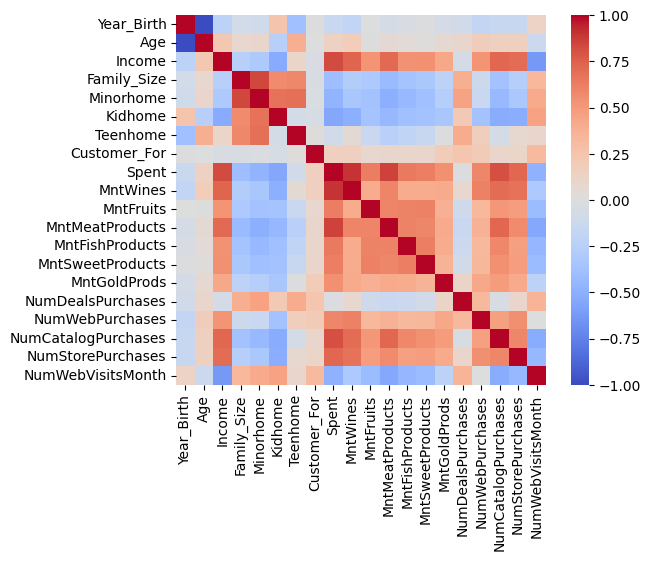

In [27]:
# select the columns to use in the HeatMap
heatmap_column_list = ['Year_Birth', 'Age', 'Income', 'Family_Size', 'Minorhome', 'Kidhome', 'Teenhome', 'Customer_For', 'Spent', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# create a Seaborn heatmap
hm = sns.heatmap(df[heatmap_column_list].corr(), xticklabels=True, yticklabels=True, cmap='coolwarm')
hm.set_aspect('equal')

# Question 6

### 1. (6.1) Marital_Status Count

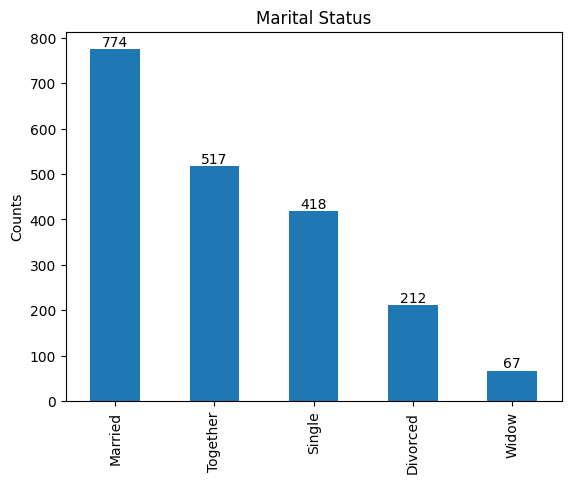

In [28]:
Marital_Status_counts = df['Marital_Status'].value_counts()

ax = Marital_Status_counts.plot.bar()

for i, count in enumerate(Marital_Status_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.title('Marital Status')
plt.ylabel('Counts')

plt.show()

### 2. (6.2) Complains Count

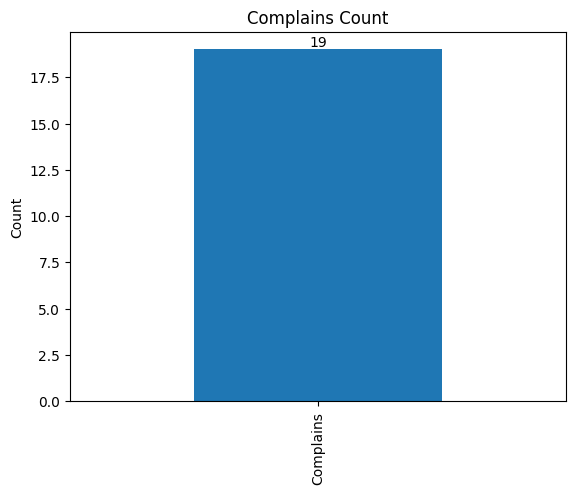

In [29]:
Complain_series = pd.Series((df['Complain'] > 0).sum(), index=['Complains'])

ax = Complain_series.plot.bar()

for i, count in enumerate(Complain_series):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.title('Complains Count')
plt.ylabel('Count')

plt.show()

### 3. (6.3) Spent - Marital_Status Correlation

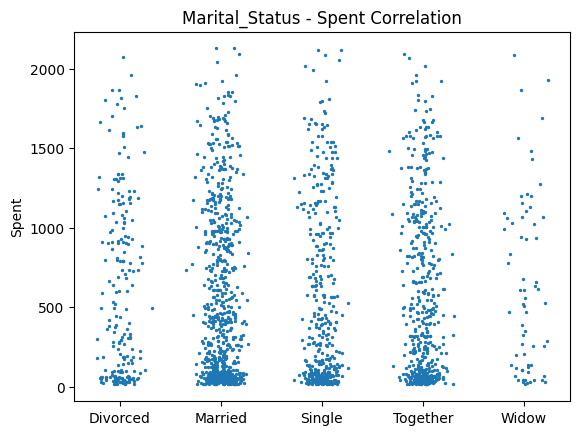

In [30]:
# make a temporary encoded copy of the Column to be jittered
df_temp = df.copy()
df_temp['Marital_Status'] = le.fit_transform(df_temp['Marital_Status'])

# add jitter to the xaxis values
x_jittered = df_temp['Marital_Status'] + np.random.normal(loc=0.0, scale=0.1, size=len(df_temp['Marital_Status']))
# create scatter plot
plt.scatter(x_jittered, df['Spent'], s=2)

plt.title('Marital_Status - Spent Correlation')
plt.ylabel('Spent')
plt.xticks(le.transform(le.classes_), le.classes_)

plt.show()

### 4. (6.4) - Minorhome - Family_Size Correlation

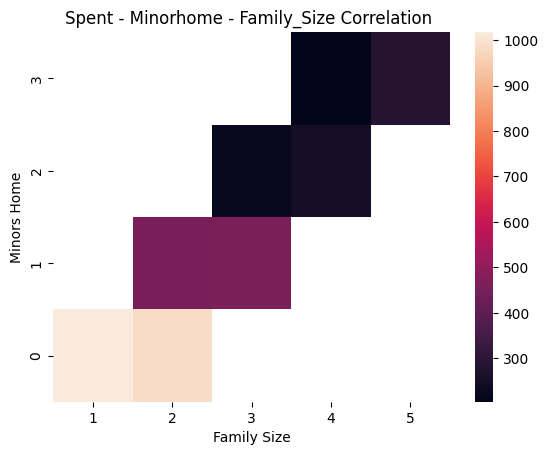

In [31]:
# make data placeholder to store the mean Spent values
data = []

for mh_size in sorted(df['Minorhome'].unique()) :
  temp_list = []
  for fs_size in sorted(df['Family_Size'].unique()) :
    temp = df.loc[(df['Minorhome'] == mh_size) & (df['Family_Size'] == fs_size)]
    if not temp['Spent'].empty:
      temp_list.append(round(temp['Spent'].mean(), 2))
    else:
      temp_list.append(np.nan)
  data.insert(0, temp_list)

# create a Seaborn heatmap
sns.heatmap(data, xticklabels=sorted(df['Family_Size'].unique()), yticklabels=sorted(df['Minorhome'].unique())[::-1])

plt.xlabel('Family Size')
plt.ylabel('Minors Home')
plt.title('Spent - Minorhome - Family_Size Correlation ')

plt.show()

### 5. (6.5) Age Group - Spent Correlation

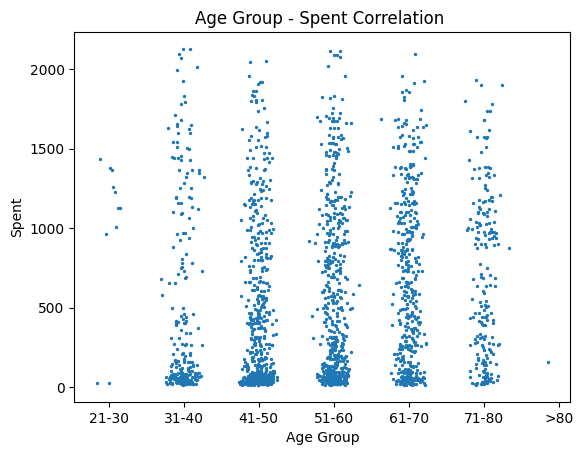

In [32]:
# make a temporary encoded copy of the Column to be jittered
df_temp = df.copy()
df_temp['Age_Group'] = le.fit_transform(df_temp['Age_Group'])
# add jitter to the xaxis values
x_jittered = df_temp['Age_Group'] + np.random.normal(loc=0.0, scale=0.1, size=len(df_temp['Age_Group']))
# create scatter plot
plt.scatter(x_jittered, df['Spent'], s=2)

plt.title('Age Group - Spent Correlation ')
plt.xlabel('Age Group')
plt.ylabel('Spent')
plt.xticks(le.transform(le.classes_), le.classes_)

plt.show()

### 6. (6.6) Income - Spent Correlation

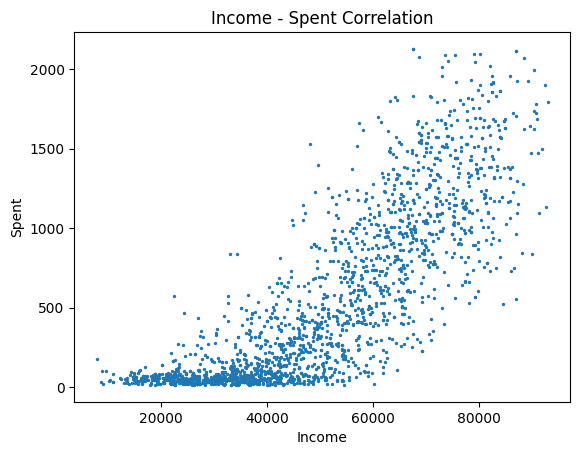

In [33]:
# create scatter plot
plt.scatter(df['Income'], df['Spent'], s=2)

plt.title('Income - Spent Correlation')
plt.xlabel('Income')
plt.ylabel('Spent')

plt.show()

### 7. (6.7) Education - Spent Correlation

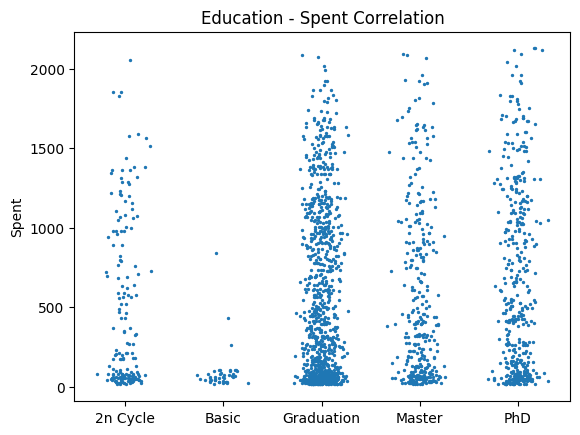

In [34]:
# make a temporary encoded copy of the Column to be jittered
df_temp = df.copy()
df_temp['Education'] = le.fit_transform(df_temp['Education'])
# add jitter to the xaxis values
x_jittered = df_temp['Education'] + np.random.normal(loc=0.0, scale=0.1, size=len(df_temp['Education']))
# create scatter plot
plt.scatter(x_jittered, df['Spent'], s=2)

plt.title('Education - Spent Correlation')
# plt.xlabel('Education')
plt.ylabel('Spent')
plt.xticks(le.transform(le.classes_), le.classes_)

plt.show()

### 8. (6.15) Histogram of Income

In [35]:
math.ceil(df['Income'].max())

92910

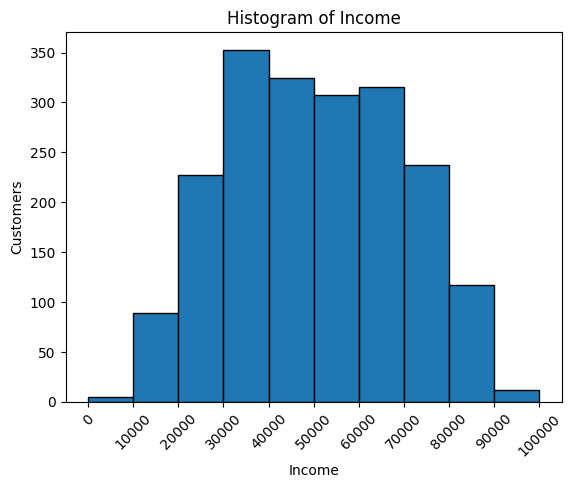

In [36]:
# create the bins of the histogram
step=10000
bins = [x for x in range(0, math.ceil(df['Income'].max()) + step, step)]
# create the histogram
plt.hist(df['Income'], bins=bins, edgecolor='black')

plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Customers')

plt.xticks(bins, labels=bins, rotation=45)

plt.show()

### 9. (6.16) Histogram of Kidhome

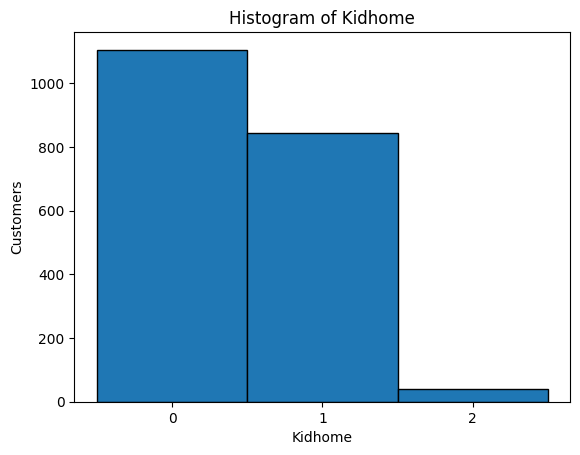

In [37]:
# create the bins of the histogram
bins = sorted(df['Kidhome'].unique())
# create the histogram
plt.hist(df['Kidhome'], bins=[x for x in range(len(bins)+1)], edgecolor='black')

plt.title('Histogram of Kidhome')
plt.xlabel('Kidhome')
plt.ylabel('Customers')
plt.xticks([x+0.5 for x in bins], labels=bins)

plt.show()

### 10. (6.18) Education - MntWines Correlation

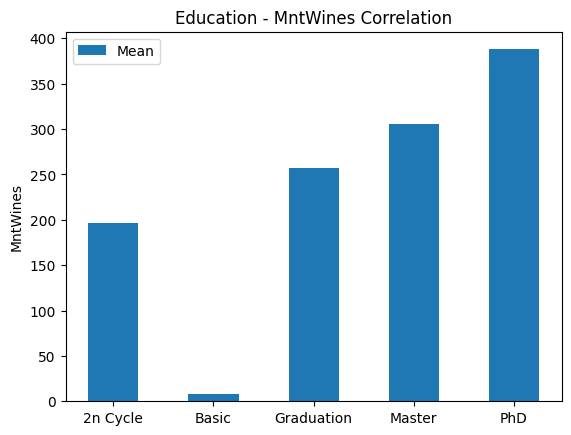

In [38]:
fig, ax = plt.subplots()
ax.bar(sorted(df['Education'].unique()), [ round(df[df['Education'] == x]['MntWines'].mean(), 2) for x in sorted(df['Education'].unique()) ], width=0.5, align='center', label='Mean')

plt.legend()
plt.title('Education - MntWines Correlation')
# plt.xlabel('Education')
plt.ylabel('MntWines')

plt.show()

# Question 7 - Principal Component Analysis (PCA)

Apply One Hot Encoding to all non numerical values

In [39]:
df_encoded = df.copy()

df_encoded['Age_Group'] = le.fit_transform(df_encoded['Age_Group'])
Age_Group_encoded = dict(zip(le.transform(le.classes_), le.classes_))

df_encoded['Education'] = le.fit_transform(df_encoded['Education'])
Education_encoded = dict(zip(le.transform(le.classes_), le.classes_))

df_encoded['Marital_Status'] = le.fit_transform(df_encoded['Marital_Status'])
Marital_Status_encoded = dict(zip(le.transform(le.classes_), le.classes_))
Education_encoded = dict(zip(le.transform(le.classes_), le.classes_))

df_encoded['Living_With'] = le.fit_transform(df_encoded['Living_With'])
Living_With_encoded = dict(zip(le.transform(le.classes_), le.classes_))

df_encoded['Is_Parent'] = le.fit_transform(df_encoded['Is_Parent'])
Is_Parent_encoded = dict(zip(le.transform(le.classes_), le.classes_))

df_encoded['Dt_Customer'] = df_encoded['Dt_Customer'].apply(lambda x : x.timestamp())
# # numerical to timestamp
# df_encoded['Dt_Customer'] = df_encoded['Dt_Customer'].apply(lambda x : pd.to_datetime(x, unit='s'))

Inspect Encoded DataFrame

In [40]:
df.head()

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Living_With,Income,Family_Size,Is_Parent,Minorhome,Kidhome,Teenhome,Dt_Customer,Recency,Customer_For,Spent,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,66,61-70,Graduation,Single,Alone,58138.0,1,False,0,0,0,2012-09-04,58,4020,1617,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,69,61-70,Graduation,Single,Alone,46344.0,3,True,2,1,1,2014-03-08,38,3490,27,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,58,51-60,Graduation,Together,Partner,71613.0,2,False,0,0,0,2013-08-21,26,3701,776,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,39,31-40,Graduation,Together,Partner,26646.0,3,True,1,1,0,2014-02-10,26,3528,53,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,42,41-50,PhD,Married,Partner,58293.0,3,True,1,1,0,2014-01-19,94,3482,422,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [41]:
df_encoded.head()

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Living_With,Income,Family_Size,Is_Parent,Minorhome,Kidhome,Teenhome,Dt_Customer,Recency,Customer_For,Spent,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,66,4,2,2,0,58138.0,1,0,0,0,0,1.346717e+09,58,4020,1617,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,69,4,2,2,0,46344.0,3,1,2,1,1,1.394237e+09,38,3490,27,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,58,3,2,3,1,71613.0,2,0,0,0,0,1.377043e+09,26,3701,776,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,39,1,2,3,1,26646.0,3,1,1,1,0,1.391990e+09,26,3528,53,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,42,2,4,1,1,58293.0,3,1,1,1,0,1.390090e+09,94,3482,422,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


Drop unwanted Columns from the DataFrame

In [42]:
drop_list = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']

df_encoded = df_encoded.drop(drop_list, axis=1)

Standardize the DataFrame

In [43]:
df_scaled = scaler.fit_transform(df_encoded)
df_scaled

array([[-0.01428806, -1.01881139,  1.01881139, ...,  0.69745044,
         0.        ,  0.        ],
       [-1.04999553, -1.27744975,  1.27744975, ..., -0.19795251,
         0.        ,  0.        ],
       [-0.4418652 , -0.32910908,  0.32910908, ..., -0.64565399,
         0.        ,  0.        ],
       ...,
       [ 0.52551649,  1.05029554, -1.05029554, ...,  0.24974896,
         0.        ,  0.        ],
       [ 0.82386207, -1.10502418,  1.10502418, ..., -1.09335547,
         0.        ,  0.        ],
       [ 1.18558677, -1.27744975,  1.27744975, ...,  0.69745044,
         0.        ,  0.        ]])

Apply PCA

In [44]:
pca = PCA(n_components=3)

# fit the PCA model to the data and transform the data
df_pca = pca.fit_transform(df_scaled)

# create a new DataFrame from the transformed data
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca

,PC1,PC2,PC3
0,5.978067,0.123033,1.360101
1,-2.712681,1.468751,-2.483047
2,3.005384,-0.685669,-0.768556
3,-2.952726,-2.499623,-0.185637
4,-0.478612,-0.906947,0.289492
...,...,...,...
1983,-2.947026,-1.589169,-0.197429
1984,-2.458275,5.193371,-1.060930
1985,2.762634,-2.774455,-0.772529
1986,2.187685,2.189057,-1.451855


Plot the PCA

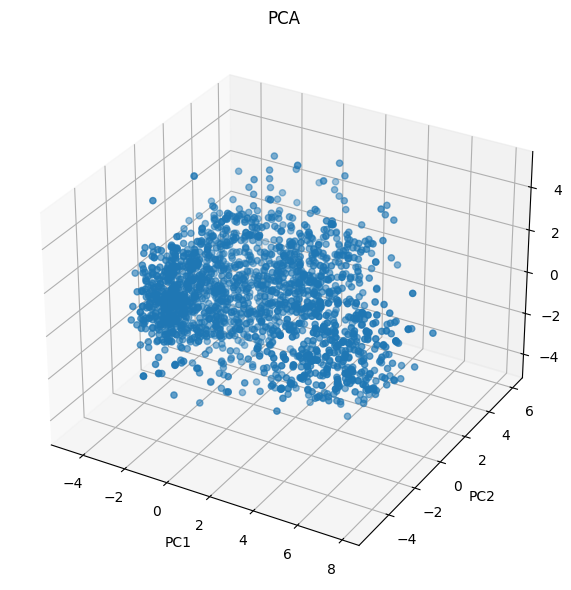

In [45]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'])

plt.title('PCA')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.tight_layout()

plt.show()

# Question 8 - Clustering

Apply the ELBOW method

In [ ]:
max_k = 10
sse = []

# run the KMeans algorithm for different values
for k in range(1, max_k+1) :
  kmeans = KMeans(n_clusters=k, n_init='auto')
  kmeans.fit(df_pca)
  sse.append(kmeans.inertia_)


Plot the SSE

In [ ]:
plt.plot(range(1, max_k+1), sse)

plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

plt.show

In [ ]:
clusters_num=4

Agglomerative Clustering

In [ ]:
ac = AgglomerativeClustering(n_clusters=clusters_num)
labels = ac.fit_predict(df_pca)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=labels)

plt.title('Agglomerative Clustering')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.tight_layout()

plt.show()

KMeans Clustering

In [ ]:
kmeans = KMeans(n_clusters=clusters_num, n_init='auto')
kmeans.fit(df_pca)

kmeans_pred = kmeans.predict(df_pca)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

colormap = np.array(['r', 'g', 'b', 'y'])
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=colormap[kmeans_pred])

plt.title('KMeans Clustering')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.tight_layout()

plt.show()